# 킥고잉 구글플레이 리뷰 분석

#### 크롤링된 킥고링 리뷰 데이터 확인
유저명, 날짜, 별점, 받은 좋아요 수, 리뷰 텍스트를 수집함

In [1]:
import pandas as pd

kick_table = pd.read_excel('kickgoing_review.xlsx')
kick_table =kick_table.drop('Unnamed: 0', axis=1)
kick_table.columns

Index(['user_name', 'date', 'rating', 'thumbs_up', 'review_text'], dtype='object')

## 전처리

In [6]:
from ckonlpy.tag import Postprocessor #전처리 라이브러리
from ckonlpy.tag import Twitter
import warnings
warnings.simplefilter("ignore")

ctwitter = Twitter()
ctwitter.add_dictionary('해주시면','Verb')
#ctwitter.add_dictionary(['타고','요청드립니다','부탁드립니다', '요청 드립니다','부탁 드립니다','해','주시면','해주시면'],'Verb')
ctwitter.add_dictionary(['따릉이','자출','킥고잉', '킥보드',
                       '대여소','연결거치','거치대','고객센터',
                        '다시','퇴근시간','대여시간',
                        '출근시간','한시간','두시간','임시폐쇄',
                         '자동로그인','UX', '1일권', '일일권','가성비',
                         '상담원','재로그인', '인증번호', '가입','렉', '랙','제로페이','결제','큐알코드','QR','뒤로가기',
                         '대여번호''결제','결재','여러번','불편','개불편함','내세금','전반적', '지도화면',
                        ], 'Noun')
#조사
ctwitter.add_dictionary(['까지','하냐'], 'Josa')
#형용사
ctwitter.add_dictionary(['레알','허접한','오지게' ,'어려워','안되', '열받','안됨', '안와' ,'참어렵네'], 'Adjective')
#부사

ctwitter.add_dictionary(['왜', '좀','진짜','최악' , '참'], 'Adverb', force=True)

ctwitter.add_dictionary(['타고','요청드립니다','부탁드립니다',
                         '요청 드립니다','부탁 드립니다','하기'],'Verb')

#무의미한 형태소 및 단어 제거
stopwords = {'수가','까지','드립','번','수','것', '앞','해주','왜',
             '곳','떄','좀','어요','요','이','감사','이','그','고','제','쪽','더','후','시','거',
'려고','적','저','데','등','역','중','해주시','내','면서','어서','때','뭐','못','마다','더니','해도','해도','다가','어가','개','하라','하나','걸'}


#단어 대치
replace = {'어플리케이션': '어플',
           '앱': '어플',
           '폐쇠':'페쇄',
           '젛은':'좋은',
           '연계':'연동',
           '맵':'지도',
           '인터페이스':'UI',
           '유아이':'UI',
           'ui': 'UI',
           'T머니' : '티머니',
           '렉':'오류',
           '랙':'오류',
           '가입': '회원가입',
          '결재':'결제',
           '버젼':'버전',
           '고객 센터': '고객센터',
           '에러': '오류',
           '버그': '오류',
           '업뎃':'업데이트' ,'업댓':'업데이트','업디이트':'업데이트','리뉴얼':'업데이트','개편':'업데이트','업그레이드':'업데이트',
           '업데이틀':'업데이트',
           '업글' :'업데이트',
           '비번':'비밀번호',
           '머지':'뭐지',
           '자동 로그인':'자동로그인',
           '딜레이':'지연',
           '정거장': '대여소','정류장': '대여소','대여수': '대여소',
           '큐알':'QR','qr':'QR','큐알코드':'QR',
           '알코':'QR',
           '리붓':'재부팅',
           '튜토리얼':'이용설명',
           '이용안내':'이용설명',
           '안되요':'안돼요',
           '카톡': '카카오톡',
           '먹통' :'오류',
           '제하': '결제',
            '카카오': '카카오톡',
            '카카오계정': '카카오톡',
           ('안되고', 'Adjective'): '안되',
           '않':'안되',
           '마니':'많이',
           '허다': '많다',
           '안와': '안되',
           '안': '안되',
           '폰':'휴대폰',
           '지도화면':'지도',
           '안됨':'안되',
           '팅김':'오류',
           '장애':'오류',
           '내세금':'세금',
           '개불편함':'불편',
           '연결거치': '연결'}

postprocessor = Postprocessor(ctwitter, stopwords = stopwords,replace = replace)

## 기존의 'konlpy' 와 'customized_konply' 비교

### 형태소 분석

In [7]:
sentences_tag = []
for sentence in kick_table['review_text']:
    sentences_tag.append(postprocessor.pos(sentence))

In [8]:
# 형용사 'Adjective'만 추출
adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Adjective']:
            adj_list.append(word)

In [11]:
from collections import Counter
counts = Counter(adj_list)
print(counts.most_common(40))

[('좋아요', 481), ('있', 226), ('안되', 217), ('입니다', 142), ('있습니다', 130), ('같아요', 127), ('좋네요', 106), ('좋습니다', 103), ('좋은', 90), ('편해요', 87), ('빠르고', 78), ('있는', 74), ('좋겠', 71), ('좋음', 68), ('없는', 63), ('같습니다', 63), ('없', 57), ('좋은데', 56), ('편하게', 56), ('없고', 51), ('재밌', 49), ('좋겠습니다', 46), ('굳', 43), ('많아서', 41), ('많은', 37), ('있는데', 37), ('있어', 37), ('있으면', 37), ('편합니다', 37), ('좋', 36), ('빠르게', 36), ('없음', 35), ('좋고', 33), ('좋겠네요', 33), ('없네요', 32), ('있음', 31), ('많고', 30), ('이런', 30), ('같은', 30), ('짧은', 27)]


In [66]:
adj_freq= pd.DataFrame(counts.most_common(40))
adj_freq= adj_freq.rename(columns={0:'morph',1: 'freq'})
adj_freq.to_excel('Yoon/kick_google_adj.xlsx')

### 명사 분석

In [12]:
#명사 추출
sentences_tag = []
for sentence in kick_table['review_text']:
    sentences_tag.append(postprocessor.pos(sentence))

noun_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun']:
            noun_list.append(word)
counts = Counter(noun_list)
print(counts.most_common(100))

[('이용', 537), ('킥보드', 364), ('킥고잉', 352), ('사용', 294), ('편리', 233), ('어플', 220), ('시간', 209), ('편', 203), ('연결', 189), ('서비스', 175), ('거리', 158), ('다른', 150), ('정말', 148), ('지역', 142), ('위치', 134), ('타고', 133), ('이동', 123), ('타', 119), ('안되', 113), ('최고', 113), ('경우', 112), ('아주', 108), ('진짜', 108), ('오류', 106), ('자주', 104), ('지도', 89), ('유용', 88), ('조금', 86), ('함', 83), ('결제', 82), ('생각', 78), ('계속', 77), ('굿', 76), ('처음', 76), ('다만', 76), ('주차', 75), ('가끔', 75), ('사람', 75), ('가격', 73), ('인증', 73), ('출퇴근', 72), ('쿠폰', 71), ('버스', 70), ('문제', 70), ('가능', 69), ('회원가입', 69), ('간편', 66), ('전동', 65), ('반납', 62), ('개선', 61), ('요금', 59), ('애매', 58), ('이나', 58), ('재미', 58), ('실패', 58), ('표시', 57), ('기기', 56), ('점', 54), ('배터리', 53), ('제일', 53), ('대여', 53), ('필요', 53), ('까운', 52), ('속도', 51), ('고장', 51), ('관리', 51), ('덕분', 50), ('완전', 50), ('아침', 50), ('택시', 49), ('불편', 49), ('매우', 49), ('출근', 49), ('강남', 47), ('길', 47), ('회사', 47), ('리뷰', 46), ('리하', 45), ('사', 45), ('그냥', 45), ('거나', 45), ('

In [37]:
#len(counts) 
len(noun_list)

240385

In [70]:
noun_freq = pd.DataFrame(counts.most_common(100))
noun_freq = noun_freq.rename(columns={0:'noun',1:'freq'})
noun_freq.to_excel('Yoon/kick_google_noun.xlsx')

In [8]:
import pandas as pd
df = pd.DataFrame(counts.most_common(40))
df.head()
df.to_excel('./adjcount.xlsx')

## Word Cloud
분석된 빈도수를 기반 단어구름 'Word Cloud' 만듬.

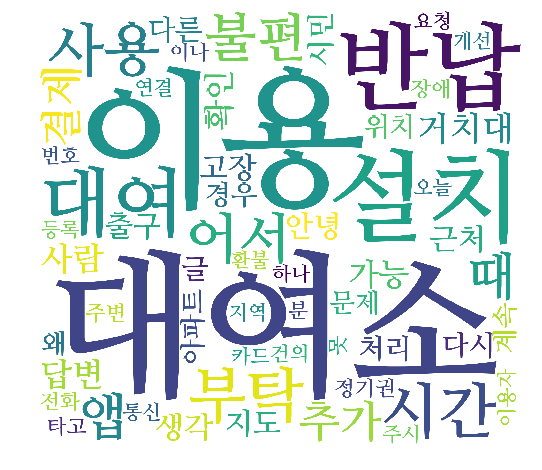

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=2000, height=1800)
cloud = wc.generate_from_frequencies(dict(tags[2:]))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [57]:
import pandas as pd

df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df = df.rename(columns={'index':'noun', 0:'count'})
df=df.sort_values(by=['count'], axis=0, ascending=False)
df.to_excel('complain_noun_chart.xlsx')

In [59]:
google_noun=[] #구글 플레이스토어 명사
complain_noun=[] #시민수렴게시판 명사
import csv
with open('google_noun_counts.csv', 'r',encoding ='utf-8-sig') as f:
    reader = csv.DictReader(f)
    for row in reader:
        google_noun.append(row['noun'])

with open('complain_noun_chart.csv', 'r',encoding ='utf-8-sig') as f:
    reader = csv.DictReader(f)
    for row in reader:
        complain_noun.append(row['noun'])

In [71]:
# 시민의견수렴 게시판과 구글플레이스토어 중복되는 명사 추출
dup_complain=[]
for complain in complain_noun[:70]:
    if complain in google_noun[:70]:
        dup_complain.append(complain)
len(dup_complain)   

28

In [73]:
print(dup_complain)


['자전거', '따릉이', '대여소', '이용', '반납', '대여', '시간', '사용', '불편', '앱', '결제', '사람', '생각', '지도', '다시', '위치', '계속', '문제', '전화', '타고', '번호', '카드', '개선', '등록', '이용권', '오류', '서울시', '어플']
